In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# #Common imports
from Bio import SeqIO
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
# import pandas as pd

# #My helper library for this analysis
import sequencing_analysis_library as SAL

In [3]:
genome_file = '/Users/adamhockenberry/Projects/Neisseria/Data/Genomes/fa1090.gb'
genome = list(SeqIO.parse(genome_file, 'genbank'))[0]

In [6]:
sample_files_rna = ['SQ-1', 'SQ-2', 'SQ-3', 'SQ-4', 'SQ-5', 'SQ-6']
organism = 'Neisseria'
file_ending = '_15_100_all'

fpkm_dict_meta_rna, feature_dict_rna, sequencing_dict_meta_f_rna, sequencing_dict_meta_r_rna =\
        SAL.wiggle_to_sequencing(genome, sample_files_rna, organism, file_ending, feature_type='CDS')

SQ-1: Total reads mapped:36867803.00010039 Percentage mapped to feature:86.60295738598663
SQ-2: Total reads mapped:27278803.73762074 Percentage mapped to feature:83.59493058432895
SQ-3: Total reads mapped:23491709.157121595 Percentage mapped to feature:85.64459481860725
SQ-4: Total reads mapped:16190652.508570375 Percentage mapped to feature:85.36258437854744
SQ-5: Total reads mapped:30839689.291754577 Percentage mapped to feature:86.67537726062827
SQ-6: Total reads mapped:21644564.32345894 Percentage mapped to feature:87.998864419237


In [7]:
sample_files_drna = ['SQ-7', 'SQ-8', 'SQ-9', 'SQ-10', 'SQ-11', 'SQ-12']
organism = 'Neisseria'
file_ending = '_15_100_all'

fpkm_dict_meta_drna, feature_dict_drna, sequencing_dict_meta_f_drna, sequencing_dict_meta_r_drna =\
        SAL.wiggle_to_sequencing(genome, sample_files_drna, organism, file_ending, feature_type='CDS')

SQ-7: Total reads mapped:4108215.3138844604 Percentage mapped to feature:67.7340856405168
SQ-8: Total reads mapped:1042580.9735747642 Percentage mapped to feature:46.00036646246384
SQ-9: Total reads mapped:6628537.366038507 Percentage mapped to feature:71.57331860979887
SQ-10: Total reads mapped:4005983.843554794 Percentage mapped to feature:64.68802288043291
SQ-11: Total reads mapped:5102294.688277299 Percentage mapped to feature:63.83557942117059
SQ-12: Total reads mapped:3133482.451174842 Percentage mapped to feature:66.45404046691797


In [9]:
total_dict_rna = {}
for sample_file in sample_files_rna:
    total_dict_rna[sample_file] = np.sum(list(sequencing_dict_meta_f_rna[sample_file].values())) +\
                                np.sum(list(sequencing_dict_meta_r_rna[sample_file].values()))
total_dict_drna = {}
for sample_file in sample_files_drna:
    total_dict_drna[sample_file] = np.sum(list(sequencing_dict_meta_f_drna[sample_file].values())) +\
                                np.sum(list(sequencing_dict_meta_r_drna[sample_file].values()))

In [38]:
plus = np.array(drna_plus)/np.array(rna_plus)
plus[np.isinf(plus)] = 0
print(plus)



[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.47820734e+02   7.87456248e+01   5.57205883e+01   3.08806372e+01
   2.43717839e+01   1.98369545e+01   1.58466428e+01   1.07044968e+01
   9.61467253e+00   9.21001459e+00   8.99582821e+00   8.65048145e+00
   8.41627782e+00   8.28232305e+00   8.14783355e+00   8.04753713e+00
   7.96221092e+00   7.89429822e+00   7.83896195e+00   7.79401879e+00
   7.76070241e+00   7.73928335e+00   7.72100692e+00   7.70509690e+00
   7.69112163e+00   7.68200259e+00   7.67387225e+00   7.66657808e+00
   7.65691944e+00   7.65169517e+00   7.64693969e+00   7.64098060e+00
   7.63396656e+00   7.62750725e+00   7.62153936e+00   7.61600888e+00
   7.61086941e+00   7.60608089e+00   7.60160858e+00   7.59742215e+00
   7.59349503e+00   7.58918434e+00   7.58152120e+00   7.57255275e+00
   7.56409097e+00   7.55609409e+00

/Users/adamhockenberry/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


/Users/adamhockenberry/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/ipykernel/__main__.py:49: RuntimeWarning: divide by zero encountered in true_divide
/Users/adamhockenberry/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/ipykernel/__main__.py:49: RuntimeWarning: invalid value encountered in true_divide


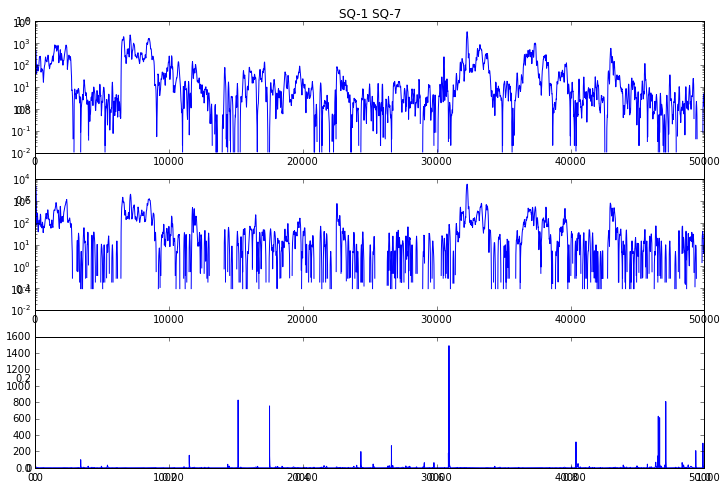

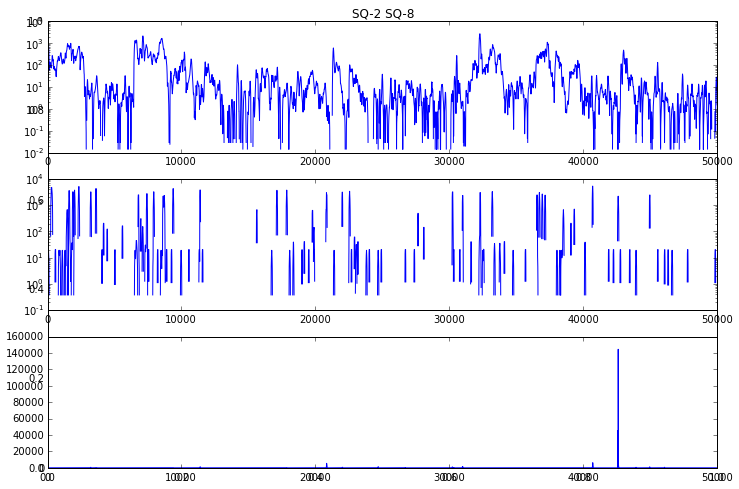

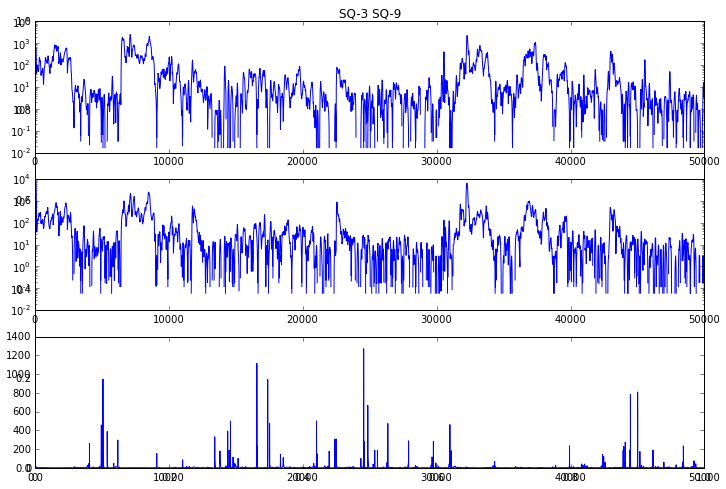

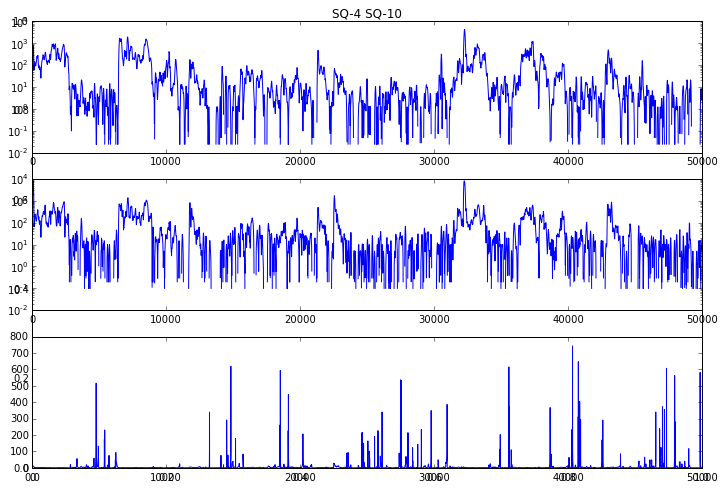

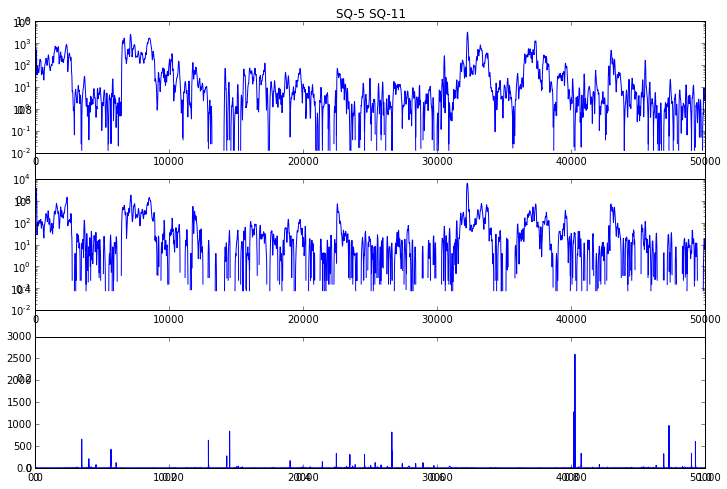

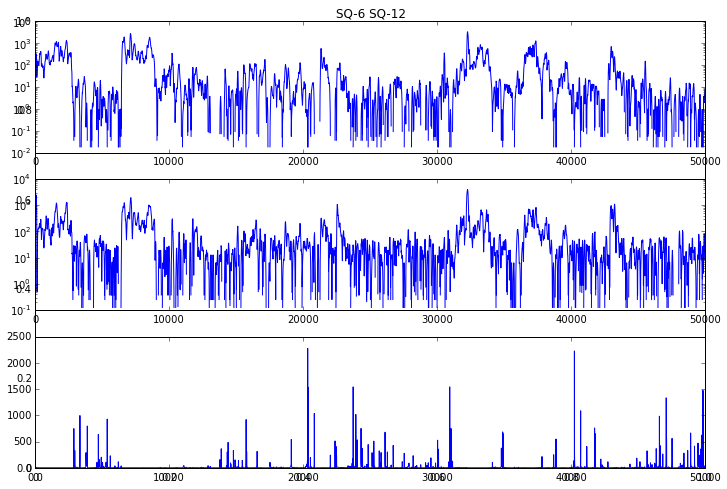

In [52]:
pairs = list(zip(sample_files_rna, sample_files_drna))
control_pairs = pairs[::2]
treatment_pairs = pairs[1::2]
window_size = 50

for pair in pairs:
    rna_plus = []
    rna_minus = []
    drna_plus = []
    drna_minus = []
    for i in range(50000):
        temp_plus_rna = []
        temp_minus_rna = []
        temp_plus_drna = []
        temp_minus_drna = []
        for j in range(i, i+window_size):
            try:
                temp_plus_rna.append(sequencing_dict_meta_f_rna[pair[0]][j])
            except KeyError:
                temp_plus_rna.append(0)
            try:
                temp_minus_rna.append(sequencing_dict_meta_r_rna[pair[0]][j])
            except KeyError:
                temp_minus_rna.append(0)

            try:
                temp_plus_drna.append(sequencing_dict_meta_f_drna[pair[1]][j])
            except KeyError:
                temp_plus_drna.append(0)
            try:
                temp_minus_drna.append(sequencing_dict_meta_r_drna[pair[1]][j])
            except KeyError:
                temp_minus_drna.append(0)           
        fpkm_plus_rna = (np.sum(temp_plus_rna) * 1000000000) / (len(temp_plus_rna) * total_dict_rna[pair[0]])
        fpkm_minus_rna = (np.sum(temp_minus_rna) * 1000000000) / (len(temp_plus_rna) * total_dict_rna[pair[0]])
        fpkm_plus_drna = (np.sum(temp_plus_drna) * 1000000000) / (len(temp_plus_drna) * total_dict_drna[pair[1]])
        fpkm_minus_drna = (np.sum(temp_minus_drna) * 1000000000) / (len(temp_plus_drna) * total_dict_drna[pair[1]])
        rna_plus.append(fpkm_plus_rna)
        rna_minus.append(fpkm_minus_rna)
        drna_plus.append(fpkm_plus_drna)
        drna_minus.append(fpkm_minus_drna)
    fig = plt.figure(figsize=(12,8))
    plt.title('{} {}'.format(pair[0], pair[1]))
    ax1 = fig.add_subplot(311)
    ax1.semilogy(rna_plus)
    ax2 = fig.add_subplot(312)
    ax2.semilogy(drna_plus)
    ax3 = fig.add_subplot(313)
    plus = np.array(drna_plus)/np.array(rna_plus)
    plus[np.isnan(plus)] = 0
    plus[np.isinf(plus)] = 0
    ax3.plot(plus)
#     ax2.plot((np.array(drna_minus)/np.array(rna_minus))*-1)
    







######################################
# ctrl_fpkm_avg_plus = []
# ctrl_fpkm_avg_minus = []
# treatment_fpkm_avg_plus = []
# treatment_fpkm_avg_minus = []


# p_vals_plus = []
# p_vals_log_plus = []

# p_vals_minus = []
# p_vals_log_minus = []

# # for i in range(len(genome.seq)-window_size):
# for i in range(500000,1000000-window_size):
#     treatment_vals_plus = []
#     control_vals_plus = []
#     treatment_vals_minus = []
#     control_vals_minus = []
#     for label in total_dict.keys():
#         temp_plus = []
#         temp_minus = []
#         for j in range(i, i+window_size):
#             try:
#                 temp_plus.append(sequencing_dict_meta_f[label][j])
#             except KeyError:
#                 temp_plus.append(0)
#             try:
#                 temp_minus.append(sequencing_dict_meta_r[label][j])
#             except KeyError:
#                 temp_minus.append(0)
                        
#         fpkm_plus = (np.sum(temp_plus) * 1000000000) / (len(temp_plus) * total_dict[label])
#         fpkm_minus = (np.sum(temp_minus) * 1000000000) / (len(temp_plus) * total_dict[label])

#         if label in control_labels:
#             control_vals_plus.append(fpkm_plus)
#             control_vals_minus.append(fpkm_minus)

#         elif label in treatment_labels:
#             treatment_vals_plus.append(fpkm_plus)
#             treatment_vals_minus.append(fpkm_minus)
    
#     ctrl_fpkm_avg_plus.append(np.mean(control_vals_plus))
#     ctrl_fpkm_avg_minus.append(np.mean(control_vals_minus))
#     treatment_fpkm_avg_plus.append(np.mean(treatment_vals_plus))
#     treatment_fpkm_avg_minus.append(np.mean(treatment_vals_minus))


#     t, p = stats.ttest_ind(control_vals_plus, treatment_vals_plus, equal_var=False)
#     p_vals_plus.append(p)
#     t, p = stats.ttest_ind(np.log(control_vals_plus), np.log(treatment_vals_plus), equal_var=False)
#     p_vals_log_plus.append(p)
    
#     t, p = stats.ttest_ind(control_vals_minus, treatment_vals_minus, equal_var=False)
#     p_vals_minus.append(p)
#     t, p = stats.ttest_ind(np.log(control_vals_minus), np.log(treatment_vals_minus), equal_var=False)
#     p_vals_log_minus.append(p)

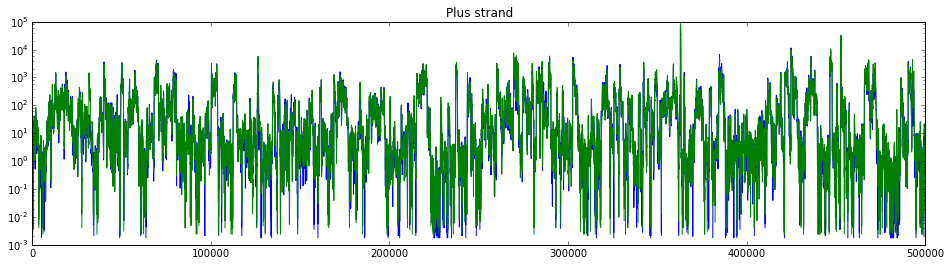

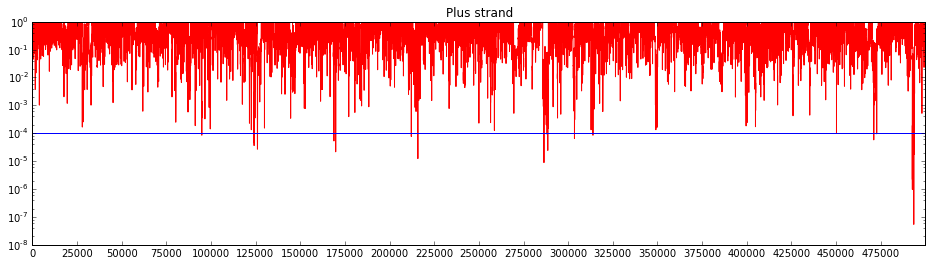

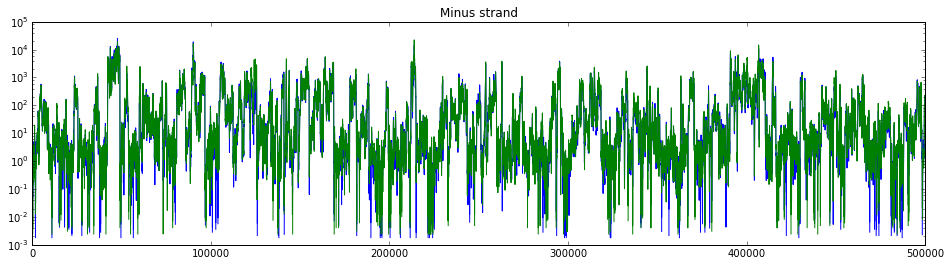

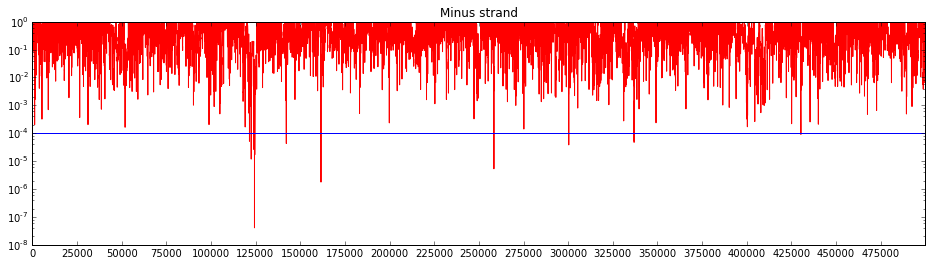

In [39]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(111)
ax.semilogy(ctrl_fpkm_avg_plus)
ax.semilogy(treatment_fpkm_avg_plus)
ax.set_title('Plus strand')

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(111)
ax.semilogy(p_vals_plus, 'r')
ax.axhline(0.0001)
# ax.semilogy(p_vals_log_plus)
ax.xaxis.set_ticks(np.arange(0,500000,25000))
ax.set_title('Plus strand')

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(111)
ax.semilogy(ctrl_fpkm_avg_minus)
ax.semilogy(treatment_fpkm_avg_minus)
ax.set_title('Minus strand')

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(111)
ax.semilogy(p_vals_minus, 'r')
ax.axhline(0.0001)
# ax.semilogy(p_vals_log_minus)
ax.xaxis.set_ticks(np.arange(0,500000,25000))
ax.set_title('Minus strand')

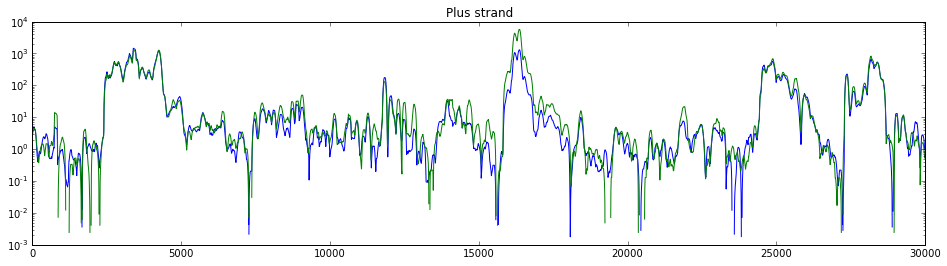

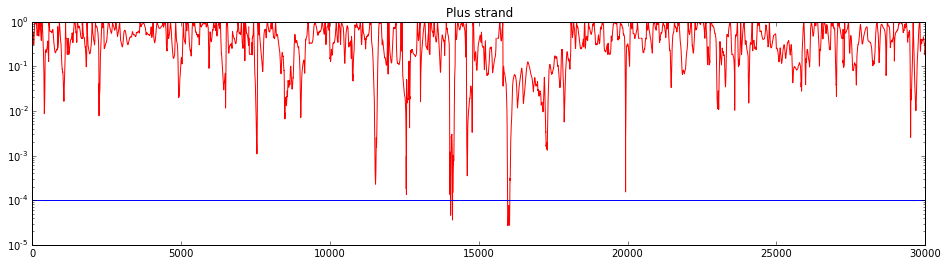

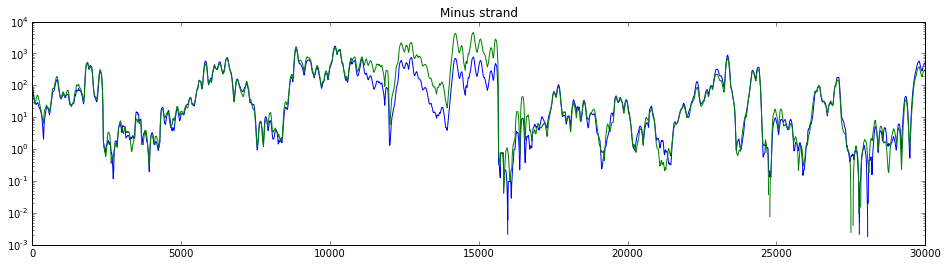

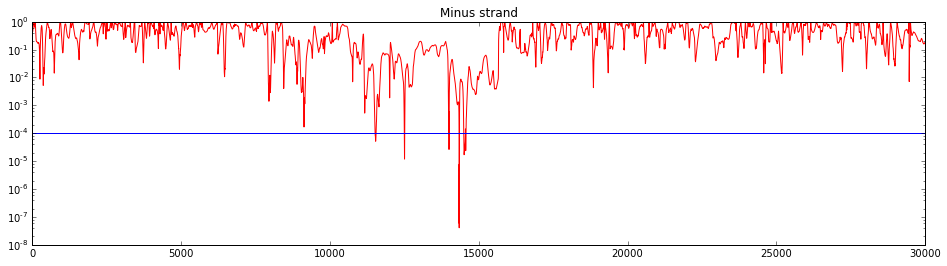

In [43]:
focus = (110000,140000)

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(111)
ax.semilogy(ctrl_fpkm_avg_plus[focus[0]:focus[1]])
ax.semilogy(treatment_fpkm_avg_plus[focus[0]:focus[1]])
ax.set_title('Plus strand')

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(111)
ax.semilogy(p_vals_plus[focus[0]:focus[1]], 'r')
# ax.semilogy(p_vals_log_plus)
ax.axhline(0.0001)
ax.set_title('Plus strand')

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(111)
ax.semilogy(ctrl_fpkm_avg_minus[focus[0]:focus[1]])
ax.semilogy(treatment_fpkm_avg_minus[focus[0]:focus[1]])
ax.set_title('Minus strand')

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(111)
ax.semilogy(p_vals_minus[focus[0]:focus[1]], 'r')
# ax.semilogy(p_vals_log_minus)
ax.axhline(0.0001)
ax.set_title('Minus strand')

In [36]:
10e-4

0.001